- The MNIST dataset is one of the most famous datasets in machine learning and computer vision.

- Images: 70,000 grayscale images of handwritten digits (0 through 9)
  - 60,000 for training
  - 10,000 for testing

- Image size: 28 x 28 pixels (784 total pixels)

- Pixel values: 0 (black) to 255 (white).

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Show the shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


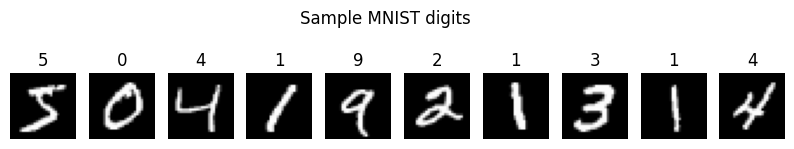

In [4]:
# Plot the first 10 images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.suptitle("Sample MNIST digits")
plt.show()

In [5]:
#Normalization of input
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]) # Shape becomes (60000, 784)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]) # Shape becomes (10000, 784)

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


### AutoEncoder model for 2D encoding

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(64, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)  
encoded4 = Dense(16, activation='relu')(encoded3)
encoded5 = Dense(8, activation='relu')(encoded4)
encoded6 = Dense(4, activation='relu')(encoded5)
encoded7 = Dense(2, activation='linear')(encoded6)

# Decoder
decoded1 = Dense(4, activation='relu')(encoded7)
decoded2 = Dense(8, activation='relu')(decoded1)
decoded3 = Dense(16, activation='relu')(decoded2)
decoded4 = Dense(32, activation='relu')(decoded3)
decoded5 = Dense(64, activation='relu')(decoded4)
decoded6 = Dense(128, activation='relu')(decoded5)
output_img = Dense(784, activation='sigmoid')(decoded6)

# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile
autoencoder.compile(optimizer='adam', loss='mse')

# Model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,834 (874.35 KB)

 Trainable params: 223,834 (874.35 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = autoencoder.fit(
    x_train,             # Input: images
    x_train,             # Target: same images (unsupervised)
    epochs=50,           # No if iterations
    batch_size=256,      # Reasonable batch size for MNIST
    shuffle=True,        # Shuffle data to avoid local patterns
    validation_data=(x_test, x_test)  # Evaluate on test set
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1296 - val_loss: 0.0637
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0606 - val_loss: 0.0548
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0539 - val_loss: 0.0519
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0513 - val_loss: 0.0492
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0489 - val_loss: 0.0476
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0475 - val_loss: 0.0474
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0464 - val_loss: 0.0455
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0454 - val_loss: 0.0454
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0446 - val_loss: 0.0441
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0440 - val_loss: 0.0437
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0434 - val_loss: 0.0437
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


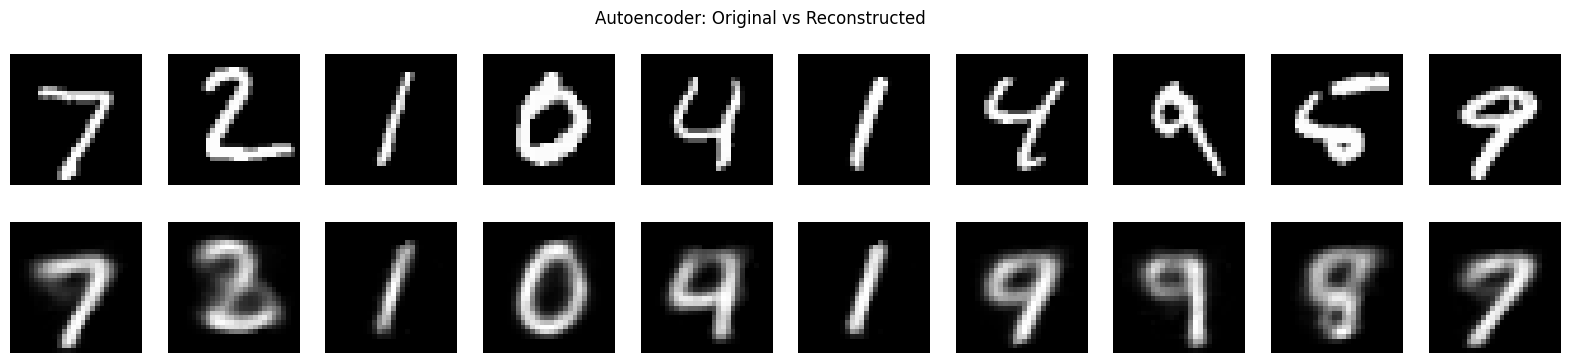

In [11]:
# Reconstruct test images
decoded_imgs = autoencoder.predict(x_test)

# Show 10 original + reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle("Autoencoder: Original vs Reconstructed")
plt.show()

In [12]:
autoencoder.layers

[<InputLayer name=input_layer, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>]

In [13]:
autoencoder.layers[7].output

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_7>

In [14]:
dim_2_model = Model(autoencoder.input, autoencoder.layers[7].output)

In [15]:
encoded_imgs = dim_2_model.predict(x_test)
print(encoded_imgs.shape)  # Should be (10000, 2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
(10000, 2)


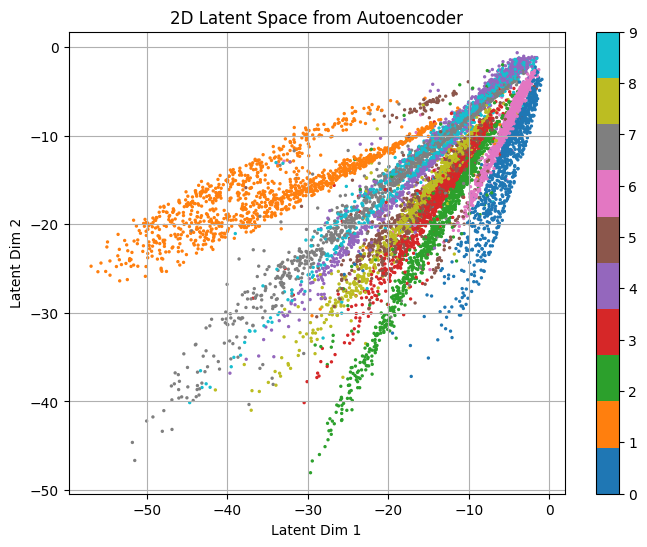

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, cmap='tab10', s=2)
plt.colorbar()
plt.title("2D Latent Space from Autoencoder")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.grid(True)
plt.show()

### PCA

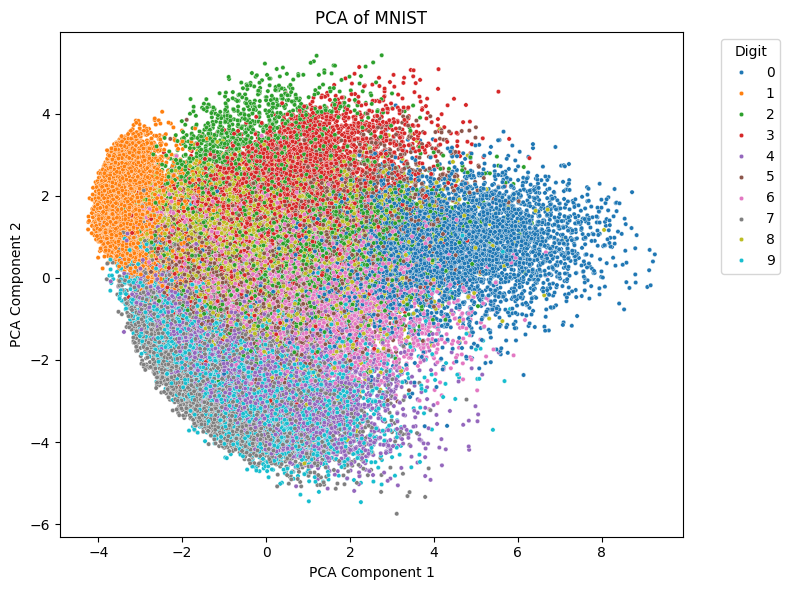

In [17]:
from sklearn.decomposition import PCA
import seaborn as sns

# Flatten the 28x28 MNIST images to 1D vectors
x_train_flat = x_train.reshape(len(x_train), -1)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_flat)

# Plot PCA-reduced data
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_train, palette='tab10', legend='full', s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of MNIST')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

🔍 Quick Interpretation:
* PCA has managed to separate some digit clusters (like 1s and 0s) fairly well.
* But many digits (like 3, 5, 8, 9) still overlap significantly.
* This confirms that PCA, being linear, can’t capture the non-linear manifolds in MNIST digits.

### t-SNE

In [18]:
from sklearn.manifold import TSNE

x_train_flat = x_train.reshape((x_train.shape[0], -1))
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_flat)

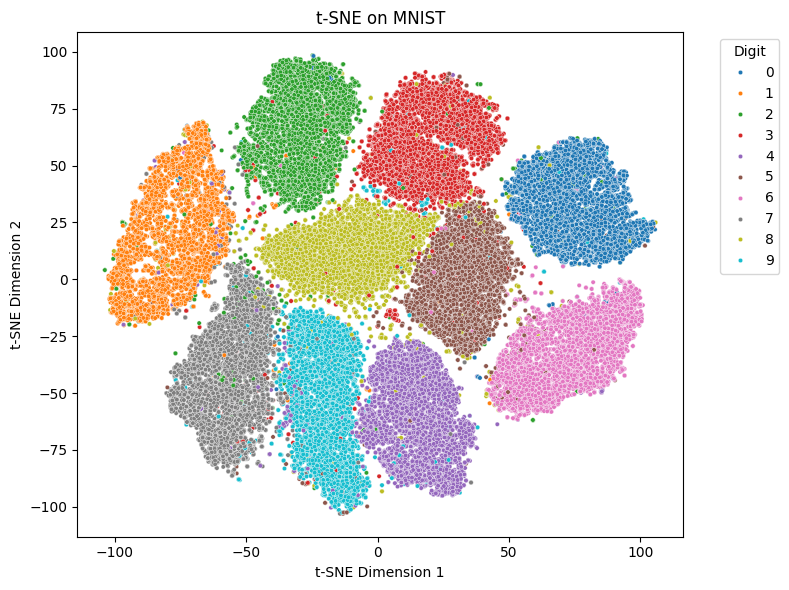

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1], hue=y_train, palette='tab10', legend='full', s=10)
plt.title('t-SNE on MNIST')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

🔍 Quick Interpretation:
* t-SNE captures non-linear structure, offering much better separation than PCA.
* Clear clusters show that t-SNE effectively groups similar digits together.
* Clear clusters show that t-SNE effectively groups similar digits together.

### UMAP

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


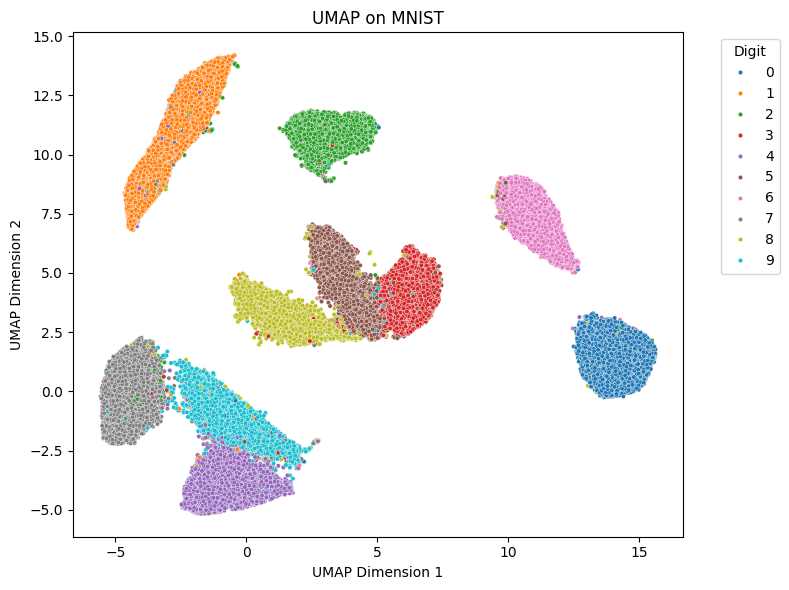

In [22]:
import umap

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
x_umap = reducer.fit_transform(x_train_flat)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_umap[:, 0], y=x_umap[:, 1], hue=y_train, palette='tab10', legend='full', s=10)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP on MNIST')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

🔍 Quick Interpretation:
* UMAP has clustered the digits from the MNIST dataset into well-separated groups in 2D space.
* Most digits form distinct, dense clusters (e.g., 1, 2, 6, 0).
* Some clusters like 3, 5, 8 slightly overlap, indicating similarity in how they are written, but still show reasonable separation.
* UMAP is more structured and interpretable than PCA and often tighter than t-SNE while being faster and scalable.

----------

✅ Key Observations
* UMAP provided the clearest, most structured 2D representation of digits.
* t-SNE also did well, but doesn't preserve overall layout — mainly useful for visualization.
* PCA was fast but not discriminative enough for handwritten digits.
* Autoencoder underperformed in 2D.